In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/emotion_sentimen_dataset.csv')

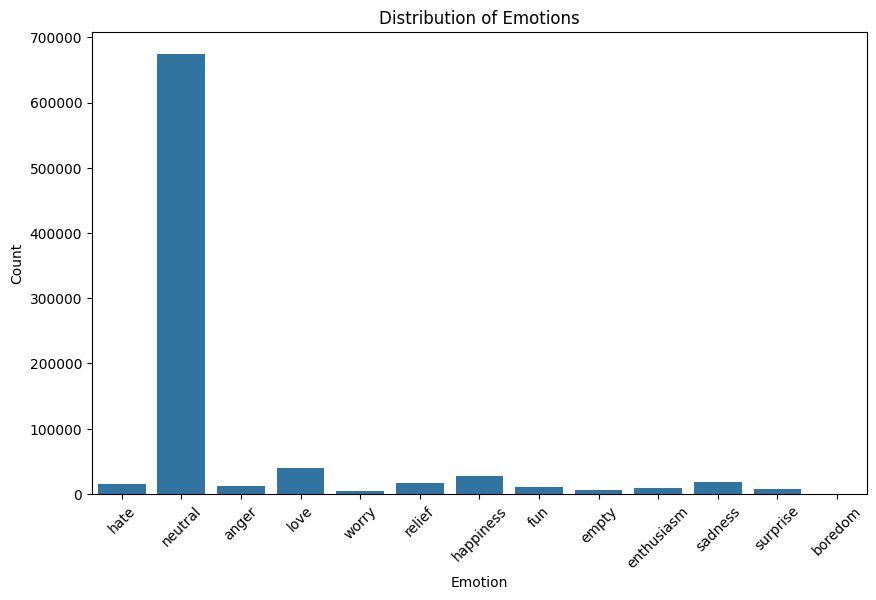

In [ ]:
# Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=data)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

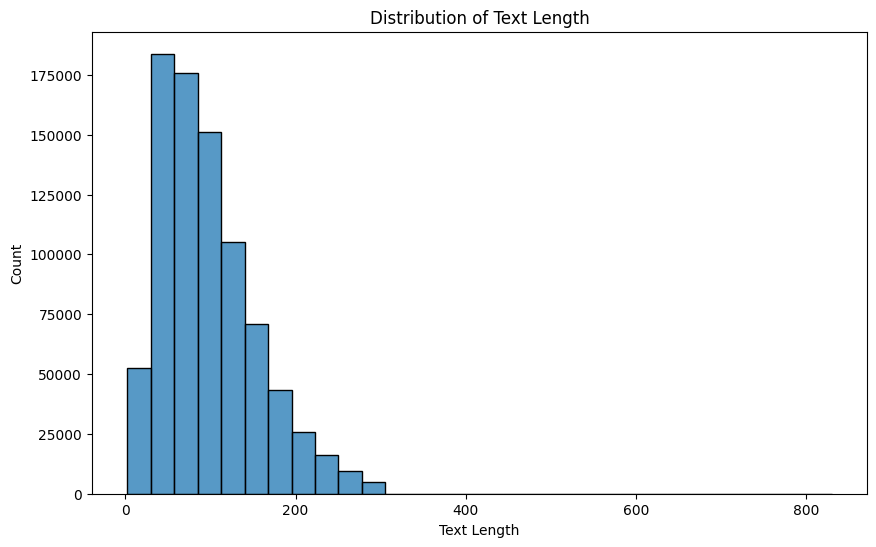

In [ ]:
# Text Length Distribution
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0     0
text           0
Emotion        0
text_length    0
dtype: int64


In [ ]:
# Remove rows with missing values in the "Emotion" column
data = data.dropna(subset=['Emotion'])
data.reset_index(drop=True, inplace=True)
print(data.head())

   Unnamed: 0                                               text  Emotion  \
0           0  i seriously hate one subject to death but now ...     hate   
1           1                 im so full of life i feel appalled  neutral   
2           2  i sit here to write i start to dig out my feel...  neutral   
3           3  ive been really angry with r and i feel like a...    anger   
4           4  i feel suspicious if there is no one outside l...  neutral   

   text_length  
0           73  
1           34  
2          131  
3           89  
4           87  


In [ ]:
data = data.drop_duplicates()

# Text cleaning
data['clean_text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove special characters
data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove numbers
data['clean_text'] = data['clean_text'].apply(lambda x: x.lower())  # Convert text to lowercase


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0     0
text           0
Emotion        0
text_length    0
clean_text     0
dtype: int64


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Tokenization
data['tokens'] = data['text'].apply(word_tokenize)

In [ ]:
#Text Normalization
data['tokens'] = data['tokens'].apply(lambda x: [word.lower() for word in x if word.isalnum()])

In [ ]:
#Stopword Removal
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Stemming
stemmer = PorterStemmer()
data['tokens'] = data['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
#Convert tokens back to text
data['clean_text'] = data['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['Emotion'], test_size=0.2, random_state=42)

In [ ]:
print("NaN values in training set:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print("\nNaN values in testing set:")
print(X_test.isnull().sum())
print(y_test.isnull().sum())

NaN values in training set:
0
0

NaN values in testing set:
0
0


In [ ]:
# Find the row(s) with NaN values in y_train
missing_indices = y_train[y_train.isnull()].index
print("Indices with NaN values in y_train:", missing_indices)

# Drop rows with NaN values from X_train and y_train
X_train = X_train.drop(index=missing_indices)
y_train = y_train.drop(index=missing_indices)
print("NaN values in y_train:", y_train.isnull().sum())

Indices with NaN values in y_train: Index([], dtype='int64')
NaN values in y_train: 0


In [ ]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
data.shape

(839555, 6)

In [ ]:
# Initialize RandomForestClassifier with all available CPU cores
classifier = RandomForestClassifier(n_jobs=-1)

In [ ]:
#Model Training
#classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)

#Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
classifiers = {
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(f"\n{name} Classification Report:\n{report}\n")


Training Support Vector Machine...


In [ ]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

LSTM


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical

In [ ]:
# Convert emotion labels to numeric labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Emotion'])

In [ ]:
# Tokenize the text data
max_words = 10000  # Maximum number of words to tokenize
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['clean_text'])
sequences = tokenizer.texts_to_sequences(data['clean_text'])

In [ ]:
# Pad sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

In [ ]:
# Define the LSTM model
embedding_dim = 100
hidden_units = 64
num_classes = len(label_encoder.classes_)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=hidden_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
batch_size = 64
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')
